# Sobre o notebook

Aproveite esse espaço para as atividades do curso de Data Visualization: gráficos de composição e relacionamento da Alura. Aqui você pode escrever e testar os códigos dos diversos desafios envolvendo os aprendizados de cada aula.

Este notebook foi construído com espaço para as células dos desafios propostos no curso, com ele você tem espaço para construir e executar suas soluções


## Paleta de Cores

Vamos compartilhar aqui a paleta de cores que usamos durante o curso pra você executar e usar em seu projeto, mas sinta-se livre para construir a sua propria.

In [1]:
# Definindo a paleta de cores
AZUL1, AZUL2, AZUL3, AZUL4, AZUL5, AZUL6 = '#174A7E', '#4A81BF', "#6495ED", '#2596BE', '#94AFC5', '#CDDBF3'
CINZA1, CINZA2, CINZA3, CINZA4, CINZA5, CINZA6, BRANCO = '#231F20', '#414040', '#555655', '#A6A6A5', '#BFBEBE', '#DEE2E6', '#FFFFFF'
VERMELHO1, VERMELHO2, LARANJA1 = '#C3514E',	'#E6BAB7',	'#F79747'
VERDE1, VERDE2, VERDE3 = '#0C8040',	'#9ABB59', '#9ECCB3'

## Aula 01 - Proporção dos dados

### Desafio 1

In [2]:
import pandas as pd

In [3]:
df_pib = pd.read_csv("https://raw.githubusercontent.com/afonsosr2/dataviz-graficos-composicao-relacionamento/master/dados/pib_br_2002_2020_estados.csv")
df_pib.head()

,ano,sigla_uf,regiao,pib,impostos_liquidos,va,va_agropecuaria,va_industria,va_servicos,va_adespss
0,2002,RO,Norte,7467629886,839731192,6627898698,715526872,1191090432,2484579193,2236702207
1,2003,RO,Norte,9425010486,1108434936,8316575548,1278658831,1216605061,3376727040,2444584625
2,2004,RO,Norte,11004641436,1288806654,9715834778,1288515348,1674933817,3986529419,2765856199
3,2005,RO,Norte,12511821181,1476144194,11035676990,1342222120,1887932121,4603783904,3201738843
4,2006,RO,Norte,13054713344,1613809974,11440903374,1238006193,2210692147,4320526746,3671678293


In [4]:
df_va_servicos = df_pib.copy()
df_va_servicos = df_va_servicos.query("ano == 2018")[['regiao', 'va_servicos']]
df_va_servicos_regiao = df_va_servicos.groupby('regiao').sum().sort_values('va_servicos', ascending = False)
df_va_servicos_regiao

,va_servicos
regiao,
Sudeste,1933221862566
Sul,546627330178
Nordeste,433449662991
Centro-Oeste,296250896281
Norte,133394247965


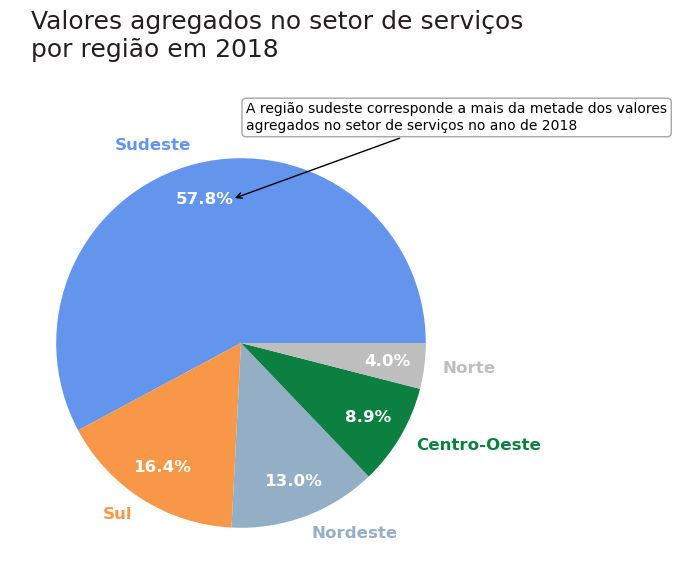

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (8, 6))

cores = [AZUL3, LARANJA1, AZUL5 , VERDE1, CINZA5]

plt.suptitle('Valores agregados no setor de serviços\npor região em 2018', fontsize = 18, color = CINZA1, ha = 'left', x = 0.25, y = 1.05)

ptc, text, _ = ax.pie(data = df_va_servicos_regiao, x = 'va_servicos', labels = df_va_servicos_regiao.index, autopct = '%.1f%%',
                     pctdistance = 0.8, textprops = dict(size = 12, fontweight = 'bold', color = BRANCO),
                     colors = cores)

for i, p in enumerate(ptc):
    text[i].set_color(p.get_facecolor())

ax.annotate('A região sudeste corresponde a mais da metade dos valores\nagregados no setor de serviços no ano de 2018',
            xy = (160, 270), xycoords = 'axes points', xytext = (170, 320), textcoords = 'axes points',
            bbox = dict(boxstyle = 'round', fc = BRANCO, ec = CINZA4),
            size = 10, arrowprops = dict(arrowstyle = '->', fc = CINZA1))    

plt.show()

### Desafio 2

In [6]:
df_norte_2010 = df_pib.query('ano == 2010')[['regiao', 'va_industria']]

df_norte_2010.loc[df_norte_2010['regiao'] == 'norte', 'regiao'] = 'Norte'
df_norte_2010.loc[df_norte_2010['regiao'] != 'Norte', 'regiao'] = 'Outras'

df_norte_2010 = df_norte_2010.groupby('regiao').sum()
df_norte_2010

,va_industria
regiao,
Norte,58665438171
Outras,845492561850


In [7]:
df_norte_2020 = df_pib.query('ano == 2020')[['regiao', 'va_industria']]

df_norte_2020.loc[df_norte_2020['regiao'] == 'norte', 'regiao'] = 'Norte'
df_norte_2020.loc[df_norte_2020['regiao'] != 'Norte', 'regiao'] = 'Outras'

df_norte_2020 = df_norte_2020.groupby('regiao').sum()
df_norte_2020

,va_industria
regiao,
Norte,137740478879
Outras,1346596521109


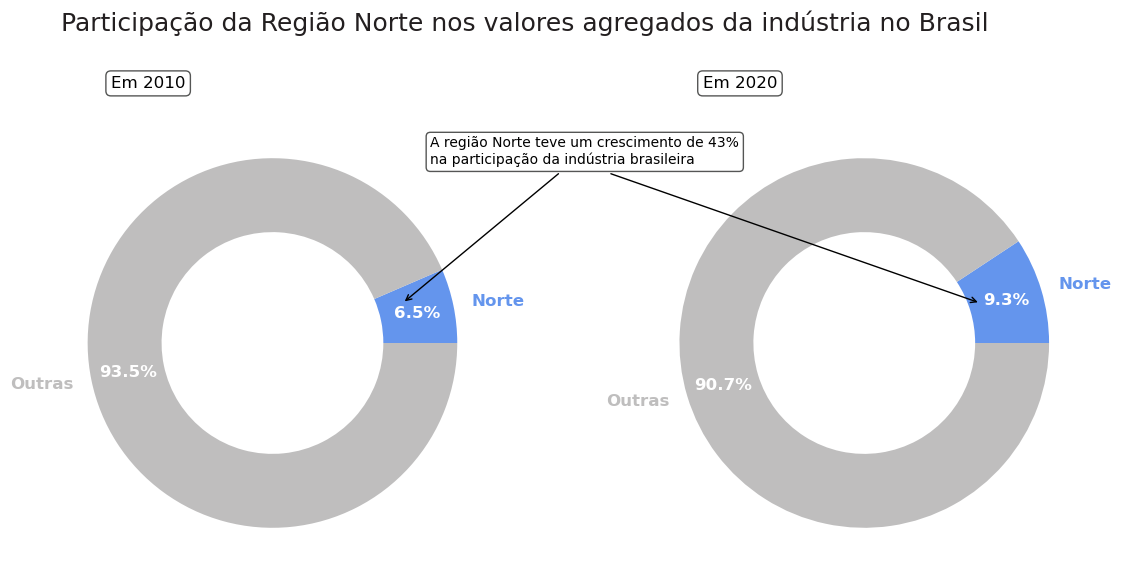

In [8]:
fig, axs = plt.subplots(1, 2, figsize = (14, 6))

cores = [AZUL3, CINZA5]

plt.suptitle('Participação da Região Norte nos valores agregados da indústria no Brasil', fontsize = 18, color = CINZA1,
             ha = 'left', x = 0.15, y = 1.05)

ptc, text, _ = axs[0].pie(data = df_norte_2010, x = 'va_industria', labels = df_norte_2010.index, autopct = '%.1f%%',
                      startangle = 0, pctdistance = 0.8, wedgeprops = dict(width = 0.4),
                      textprops = dict(size = 12, fontweight = 'bold', color = BRANCO),
                      colors = cores)

axs[0].annotate('Em 2010', xy = (50, 350), size = 12, xycoords = 'axes points',
                bbox = dict(boxstyle = 'round', fc = BRANCO, ec = CINZA3))

for i, p in enumerate(ptc):
    text[i].set_color(p.get_facecolor())

ptc, text, _ = axs[1].pie(data = df_norte_2020, x = 'va_industria', labels = df_norte_2020.index, autopct = '%.1f%%',
                      startangle = 0, pctdistance = 0.8, wedgeprops = dict(width = 0.4),
                      textprops = dict(size = 12, fontweight = 'bold', color = BRANCO),
                      colors = cores)

axs[1].annotate('Em 2020', xy = (50, 350), size = 12, xycoords = 'axes points',
                bbox = dict(boxstyle = 'round', fc = BRANCO, ec = CINZA3))

for i, p in enumerate(ptc):
    text[i].set_color(p.get_facecolor())

axs[0].annotate('A região Norte teve um crescimento de 43%\nna participação da indústria brasileira',
                xy = (260, 195), xycoords = 'axes points', xytext = (280, 295), textcoords = 'axes points',
                bbox = dict(boxstyle = 'round', fc = BRANCO, ec = CINZA3),
                size = 10, arrowprops = dict(arrowstyle = '->', fc = CINZA1))

axs[1].annotate('\n\n', xy=(250, 195), xycoords = 'axes points', xytext = (-20, 275), textcoords = 'axes points',
                size = 10, arrowprops = dict(arrowstyle = '->', fc = CINZA1))

plt.show()

## Aula 02 - Compondo dados estáticos

### Desafio 1

In [9]:
sp = df_pib.query('sigla_uf == "SP" and ano == 2020')[['va', 'impostos_liquidos', 'pib']]
sp.rename(columns = {"pib":"PIB", "impostos_liquidos": "Impostos Líquidos", "va":"Valor Adicionado Bruto"}, inplace = True)
sp

,Valor Adicionado Bruto,Impostos Líquidos,PIB
379,2014850308310,362788671543,2377638979835


In [10]:
sp = sp.melt(var_name = 'Indicadores', value_name = 'Valores')
# sp.loc[sp['Indicadores'] == 'Impostos Líquidos', 'Valores'] = sp['Valores'] * -1
sp['Valores_str'] = (sp['Valores'] / 1e9).map('R$ {:,.2f} Bi'.format)
sp['Medidas'] = ['absolute', 'relative', 'total']

sp

,Indicadores,Valores,Valores_str,Medidas
0,Valor Adicionado Bruto,2014850308310,"R$ 2,014.85 Bi",absolute
1,Impostos Líquidos,362788671543,R$ 362.79 Bi,relative
2,PIB,2377638979835,"R$ 2,377.64 Bi",total


In [11]:
import plotly.graph_objects as go

fig = go.Figure(go.Waterfall(name = '', orientation = 'v', measure = sp['Medidas'],
                             x = sp['Indicadores'], y = sp['Valores'], 
                             text = sp['Valores_str'], textposition = 'outside',
                             connector_line = dict(color = CINZA3),
                             totals_marker = dict(color = AZUL3),
                             decreasing_marker = dict(color = VERMELHO1)
                             )
                )

fig.update_layout(width=1000, height=500, font_family = 'DejaVu Sans', font_size=15,
                  font_color= CINZA2, title_font_color= CINZA1, title_font_size=24,
                  title_text='Distribuição do Produto Interno Bruto (PIB) de São Paulo em 2020' +
                             '<br><sup size=1 style="color:#555655">Impostos líquidos e Valores ' +
                              'Adicionados Brutos de bens e serviços (em bilhões de reais)</sup>',
                  title_pad_l = 50, plot_bgcolor= BRANCO, yaxis_range=[0,2800e9], hovermode="closest")

fig.update_yaxes(showticklabels = False)

fig.update_traces(hovertemplate = '<b>%{x}<b> = %{text}')

fig.add_annotation(text='Fonte dos dados: <a href="https://sidra.ibge.gov.br/pesquisa/pib-munic/tabelas">Produto Interno Bruto | IBGE</a>',
                   align="left", xref="paper", yref = "paper", x=1, y=-0.2, showarrow=False)
fig.show()

### Desafio 2

In [12]:
anos = [x for x in range(2016,2021)]

nordeste = df_pib.query('regiao == "Nordeste" and ano ==@anos')[['ano', 'va_servicos']]
nordeste = nordeste.groupby('ano').sum()
nordeste = nordeste.reset_index()
nordeste

,ano,va_servicos
0,2016,391149062027
1,2017,413890511671
2,2018,433449662991
3,2019,450661680677
4,2020,436102799877


In [13]:
nordeste['variacao_va_servicos'] = nordeste['va_servicos'].diff().fillna(nordeste['va_servicos']).astype('int64')
nordeste['medidas'] = ['absolute'] + 4 * ['relative']
nordeste

,ano,va_servicos,variacao_va_servicos,medidas
0,2016,391149062027,391149062027,absolute
1,2017,413890511671,22741449644,relative
2,2018,433449662991,19559151320,relative
3,2019,450661680677,17212017686,relative
4,2020,436102799877,-14558880800,relative


In [14]:
atualizacao = pd.Series({'ano': 'total',
                          'va_servicos': nordeste['va_servicos'].values[-1],
                          'variacao_va_servicos': nordeste['va_servicos'].values[-1],
                          'medidas': 'total'}).to_frame().T

nordeste = pd.concat([nordeste, atualizacao], axis = 0, ignore_index = True)
nordeste = nordeste.drop(columns = ['va_servicos'])

nordeste['variaca_va_servicos_texto'] = (nordeste['variacao_va_servicos'] / 1e9).map('R$ {:,.2f} Bi'.format)
nordeste.rename(columns = {'ano': 'Ano', 'variacao_va_servicos': 'Variação de Serviços', 'variaca_va_servicos_texto': 'Variação de Serviços (texto)'}, inplace = True)

nordeste


,Ano,Variação de Serviços,medidas,Variação de Serviços (texto)
0,2016,391149062027,absolute,R$ 391.15 Bi
1,2017,22741449644,relative,R$ 22.74 Bi
2,2018,19559151320,relative,R$ 19.56 Bi
3,2019,17212017686,relative,R$ 17.21 Bi
4,2020,-14558880800,relative,R$ -14.56 Bi
5,total,436102799877,total,R$ 436.10 Bi


In [15]:
import plotly.graph_objects as go
import numpy as np

fig = go.Figure(
                go.Waterfall(name = '', orientation = 'v', measure = nordeste['medidas'],
                             y = nordeste['Variação de Serviços'], text = nordeste['Variação de Serviços (texto)'],
                             textposition = 'outside',
                             connector_line = dict(color = CINZA3),
                             totals_marker = dict(color = AZUL3),
                             increasing_marker = dict(color = VERDE1),
                             decreasing_marker = dict(color = VERMELHO1)                             
                            )
                )

fig.update_layout(width = 800, height = 400, font_family = 'DejaVu Sans', font_size = 15,
                  font_color = CINZA2, title_font_color = CINZA1, title_font_size = 24,
                  title_text='Variação do Valor Agregado de Serviços da Região Nordeste' +
                             '<br><sup size=1 style="color:#555655">De 2016 a 2020 (em bilhões de reais)</sup>',
                  plot_bgcolor = BRANCO, yaxis_range = [0, 500e9]
                  )

fig.update_yaxes(showticklabels = False)

fig.update_xaxes(tickmode = 'array', tickvals = np.arange(0, 6), ticktext = nordeste['Ano'])

fig.update_traces(hovertemplate = '<b>%{x}<b> = %{text}')

fig.add_annotation(text = "A região <b>Nordeste</b> apresentou <br>recuo no valor agregado <br>de serviços apenas em <b>2020<b>",
                   align = 'left', axref = 'x', ayref = 'y', ax = 3, ay = 250e9, x = 4, y = 380e9,
                   arrowhead = 1, arrowside = 'start', showarrow = True, arrowwidth = 2, arrowcolor = CINZA3,
                   bordercolor = CINZA3, borderwidth = 1, borderpad = 4)



fig.show()

## Aula 03 - Compondo dados dinâmicos

### Desafio 1

In [16]:
anos = [x for x in range(2017, 2021)]
df_regiao = df_pib.query('ano == @anos')[['regiao', 'ano', 'pib']]
df_regiao['pib'] = (df_regiao['pib'] / 1e12).round(2)
df_regiao = df_regiao.reset_index(drop = True)
df_regiao.head()

,regiao,ano,pib
0,Norte,2017,0.04
1,Norte,2018,0.04
2,Norte,2019,0.05
3,Norte,2020,0.05
4,Norte,2017,0.01


In [17]:
df_regiao_crosstab = pd.crosstab(index = df_regiao['ano'], columns = df_regiao['regiao'], values = df_regiao['pib'],
                                 aggfunc = 'sum', normalize = False)

df_regiao_crosstab = df_regiao_crosstab[['Sudeste', 'Sul', 'Nordeste', 'Centro-Oeste', 'Norte']]
df_regiao_crosstab = df_regiao_crosstab.reset_index()
df_regiao_crosstab



regiao,ano,Sudeste,Sul,Nordeste,Centro-Oeste,Norte
0,2017,3.48,1.12,0.95,0.66,0.36
1,2018,3.72,1.20,1.01,0.70,0.39
2,2019,3.92,1.27,1.04,0.73,0.43
3,2020,3.95,1.31,1.09,0.79,0.49


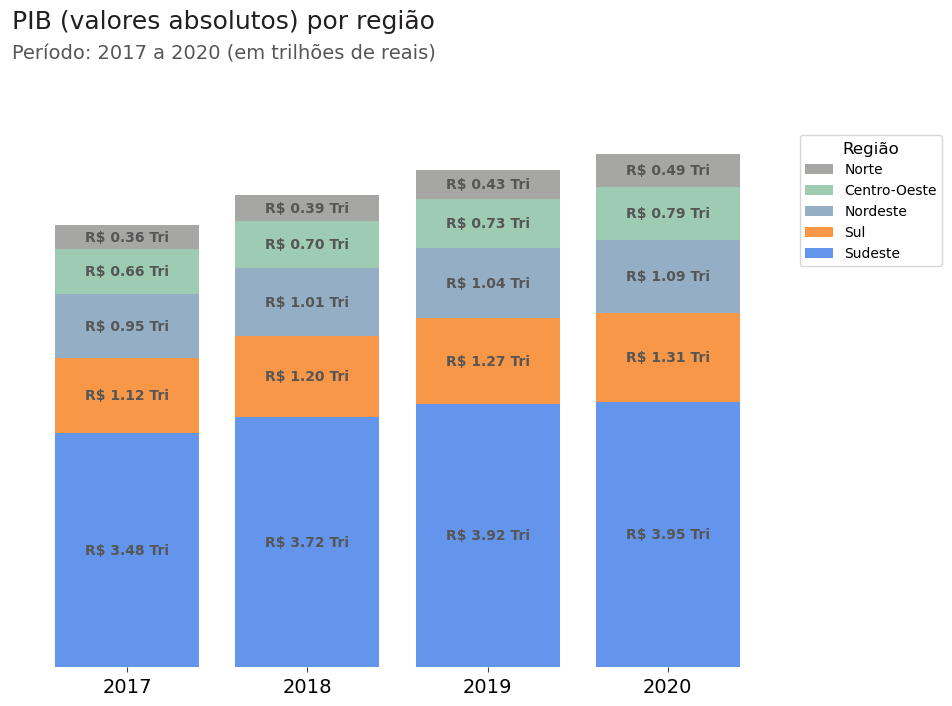

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize = (10, 7))

cores = [AZUL3, LARANJA1, AZUL5, VERDE3, CINZA4]

df_regiao_crosstab.plot(x = 'ano', kind = 'bar', stacked = True, width = 0.8, color = cores, ax = ax)

fig.suptitle('PIB (valores absolutos) por região', fontsize = 18, color = CINZA1, ha = 'right', x = 0.55, y = 1.05)
plt.title('Período: 2017 a 2020 (em trilhões de reais)', fontsize = 14, color = CINZA3, pad = 50, ha = 'right', x = 0.55)
ax.legend(bbox_to_anchor = (1.01, 1), reverse = True, title='Região', title_fontsize  = 12, fontsize = 10)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_yticklabels([])
ax.tick_params(axis = 'y', left = False)
ax.xaxis.set_tick_params(labelsize = 14, color = CINZA2, labelrotation = 0)
ax.set_frame_on(False)

for container in ax.containers:
    labels = [f'R$ {valor.get_height():.2f} Tri' for valor in container]
    ax.bar_label(container, label_type = 'center', labels = labels, size = 10, color = CINZA3, fontweight = 'bold')

plt.show()

### Desafio 2

In [19]:
df_co = df_pib.query('regiao == "Centro-Oeste" and ano == 2020')[["sigla_uf", "va_servicos", "va_industria", "va_adespss", "va_agropecuaria"]]
df_co = df_co.set_index('sigla_uf')
df_co = df_co.sort_values('va_servicos', axis = 0)
df_co

,va_servicos,va_industria,va_adespss,va_agropecuaria
sigla_uf,,,,
MS,40463334838,23313710730,20075400418,26045011196
MT,62253821963,27663774472,23686938663,46004316712
GO,89797907217,47124851599,33887411346,29022562983
DF,116547655370,10942472569,111267001381,1623976909


In [20]:
from matplotlib import transforms

def texto_colorido(x, y, texto, cores, esp=20, ax=None, **kw):
    cores = list(reversed(cores))
    t = ax.transData
    canvas = ax.figure.canvas

    for i, linha in enumerate(reversed(texto.split('\n'))):
        frases = linha.split('||')
        for s, cor in zip(frases, cores[i]):
            texto = ax.text(x, y, s, color=cor, transform=t, **kw)
            texto.draw(canvas.get_renderer())
            ex = texto.get_window_extent()
            t = transforms.offset_copy(texto._transform, x=ex.width,
                                       units='dots')

        t = transforms.offset_copy(ax.transData, x=0, y=(i + 1) * esp, units='dots')

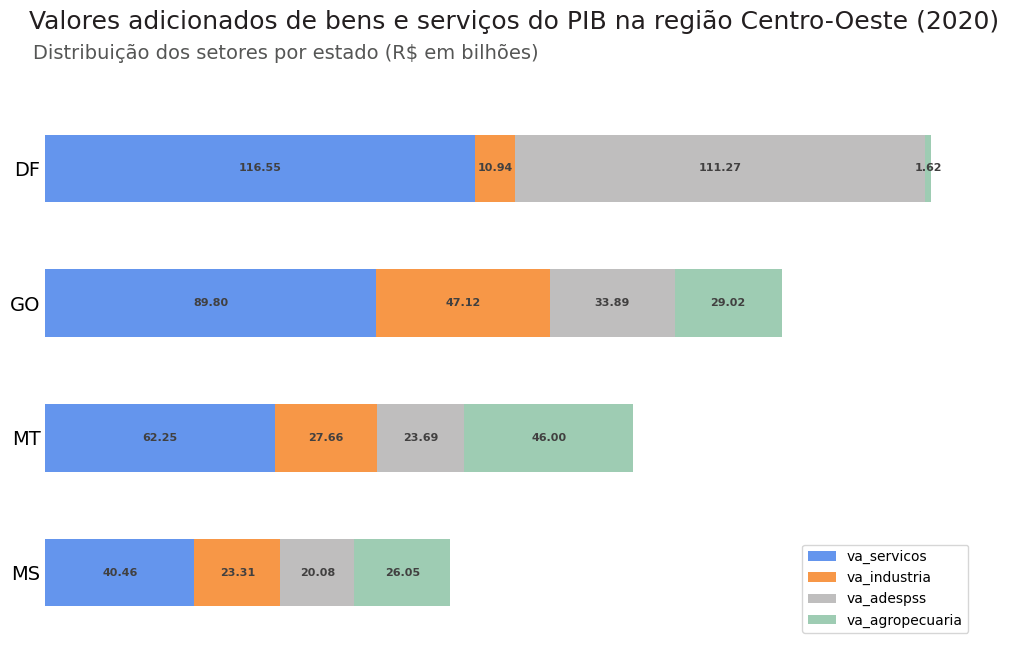

In [21]:
def grafico_va():

    fig, ax = plt.subplots(figsize = (12, 7))

    cores = [AZUL3, LARANJA1, CINZA5, VERDE3]

    df_co.plot(kind = 'barh', stacked = True, color = cores, ax = ax)

    plt.suptitle('Valores adicionados de bens e serviços do PIB na região Centro-Oeste (2020)', size = 18, color = CINZA1, 
                 ha = 'right', x = 0.92, y = 1.01)
    plt.title('Distribuição dos setores por estado (R$ em bilhões)', fontsize = 14, color = CINZA3, pad = 30, ha = 'right', x = 0.53)
    ax.set_ylabel('')
    ax.yaxis.set_tick_params(labelsize = 14, color = CINZA2)
    ax.set_xticklabels([])
    ax.tick_params(axis = 'both', which = 'both', length = 0)
    ax.set_frame_on(False)

    for container in ax.containers:
        labels = [f'{valor.get_width() / 1e9:.2f}' for valor in container]
        ax.bar_label(container, labels = labels, label_type = 'center', size = 8, color = CINZA2, fontweight = 'bold')

    return ax, cores

ax, cores = grafico_va()

C:\Users\Giuliano\AppData\Local\Temp\ipykernel_6616\4147343299.py:32: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



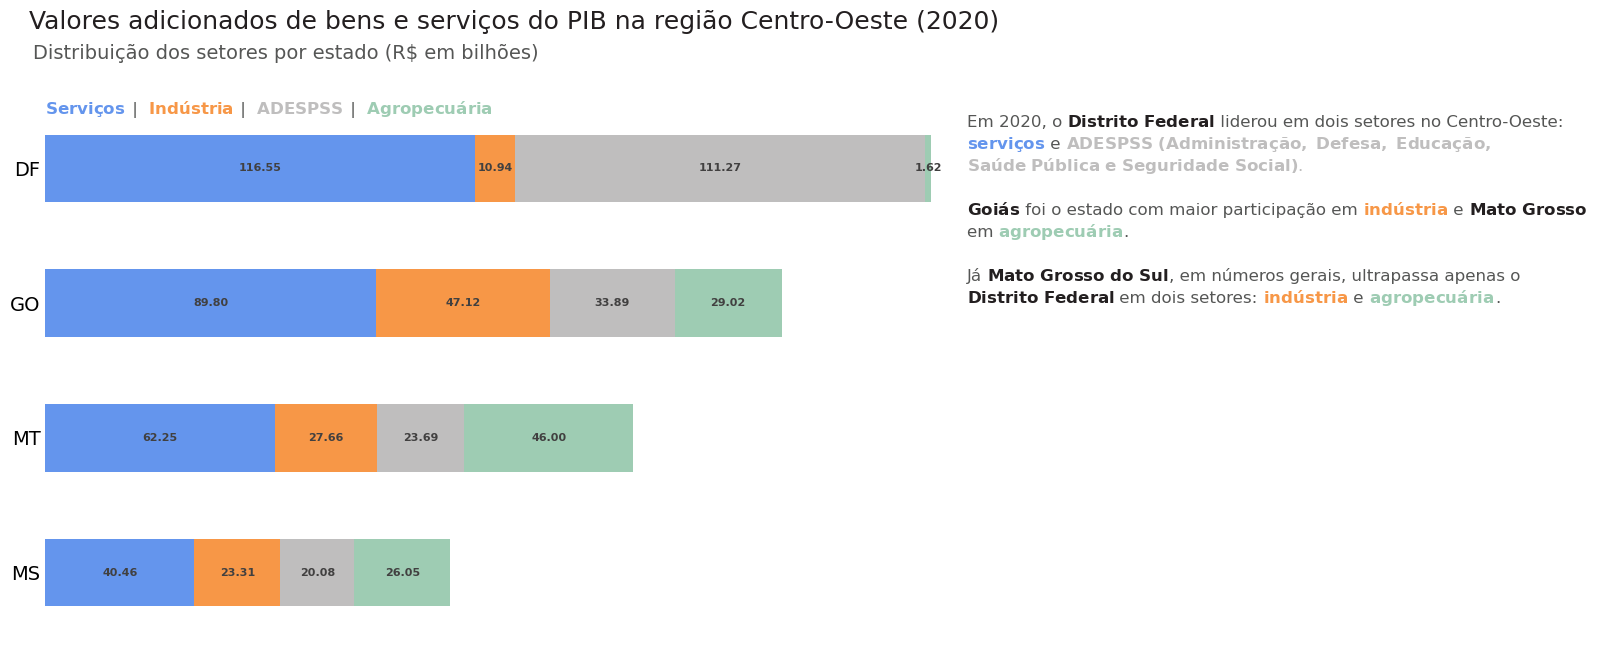

In [22]:
ax, cores = grafico_va()

ax.legend().remove()
texto_colorido(0, 3.4, '$\\bf{Serviços}$ || | || $\\bf{Indústria}$ || | || $\\bf{ADESPSS}$ || | || $\\bf{Agropecuária}$',
               cores = [[cores[0], CINZA3, cores[1], CINZA3, cores[2], CINZA3, cores[3]]], ax = ax, fontsize = 12)

texto_colorido(
    250e9, 2,                                                             # coordenadas
    'Em 2020, o ||$\\bf{Distrito\ Federal}$|| liderou em dois setores no Centro-Oeste:\n'
    '$\\bf{serviços}$|| e ||$\\bf{ADESPSS\ (Administração,\ Defesa,\ Educação,}$\n'
    '$\\bf{Saúde\ Pública\ e\ Seguridade\ Social)}$.\n'
    '\n'
    '$\\bf{Goiás}$|| foi o estado com maior participação em ||$\\bf{indústria}$|| e ||$\\bf{Mato\ Grosso}$\n'
    'em ||$\\bf{agropecuária}$||.\n'
    '\n'
    'Já ||$\\bf{Mato\ Grosso\ do\ Sul}$||, em números gerais, ultrapassa apenas o\n'
    '$\\bf{Distrito\ Federal}$|| em dois setores: ||$\\bf{indústria}$|| e ||$\\bf{agropecuária}$ ||.',
    [[CINZA3, CINZA1, CINZA3],                     # linha 1                          # cores
     [AZUL3, CINZA3, CINZA5],                      # linha 2
     [CINZA5],                                     # linha 3
     [CINZA3],                                     # linha 4
     [CINZA1, CINZA3, LARANJA1, CINZA3, CINZA1],   # linha 5
     [CINZA3, VERDE3, CINZA3],                     # linha 6
     [CINZA3],                                     # linha 7
     [CINZA3, CINZA1, CINZA3],     # linha 8
     [CINZA1, CINZA3, LARANJA1, CINZA3, VERDE3, CINZA3],   # linha 9
    ],
    esp=22,         # espaçamento
    ax=ax,          # figura onde desenhar o texto
    fontsize=12)

fig.show()



## Aula 04 - Investigando a variação dos dados

### Desafio 1

In [23]:
df_regiao = df_pib[['ano', 'regiao', 'va_adespss']]

df_regiao = pd.crosstab(index = df_regiao['ano'], columns = df_regiao['regiao'],
                        values = df_regiao['va_adespss'], aggfunc = 'sum', normalize = 'index')

df_regiao = (df_regiao * 100).round(2)
df_regiao = df_regiao[['Sudeste', 'Nordeste', 'Centro-Oeste', 'Sul', 'Norte']]

df_regiao.head()

regiao,Sudeste,Nordeste,Centro-Oeste,Sul,Norte
ano,,,,,
2002,45.80,19.25,15.24,12.44,7.27
2003,45.17,19.17,15.23,13.08,7.34
2004,44.67,19.03,16.03,12.82,7.45
2005,44.41,19.51,15.72,12.83,7.52
2006,43.70,19.99,16.02,12.61,7.68


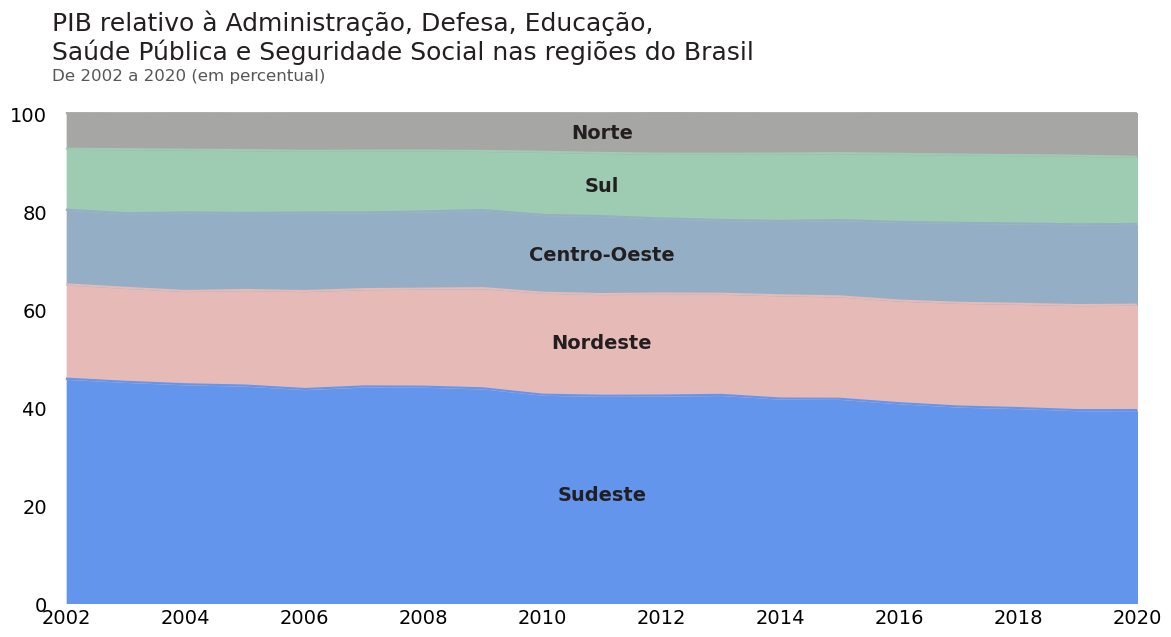

In [24]:
fig, ax = plt.subplots(figsize = (14, 7))

cores = [AZUL3, VERMELHO2, AZUL5, VERDE3, CINZA4]

df_regiao.plot(kind = 'area', stacked = True, color = cores, ax = ax, xticks = range(2002, 2021, 2))

ax.set_title('PIB relativo à Administração, Defesa, Educação, \nSaúde Pública e Seguridade Social nas regiões do Brasil', 
             fontsize = 18, color = CINZA1, loc='left', x = 0, transform=ax.transAxes)
ax.text(0, 0.97, "De 2002 a 2020 (em percentual)", transform = ax.transAxes, color = CINZA3, fontsize = 12, ha = 'left')
ax.set_ylabel('')
ax.set_xlabel('')
ax.xaxis.set_tick_params(labelsize = 14, color = CINZA2)
ax.yaxis.set_tick_params(labelsize = 14, color = CINZA2)
ax.legend().remove()
ax.tick_params(axis = 'both', which = 'both', length = 0)
plt.ylim(0, 110)
ax.set_xbound(2001.75,2020) 
ax.set_frame_on(False)

reg = df_regiao.columns
y_pos = [21, 52, 70, 84, 95]
for i in range(len(reg)):
    ax.text(2011, y_pos[i], f'{reg[i]}', color = CINZA1, weight = 'bold', fontsize = 14, 
            ha = 'center', transform = ax.transData)

plt.show()   


### Desafio 2

In [25]:
df_industria_slope = df_pib.query('ano == [2010, 2015, 2020]')[['regiao', 'ano', 'va_industria']]

df_industria_slope = pd.crosstab(index = df_industria_slope['ano'], columns = df_industria_slope['regiao'],
                                 values = df_industria_slope['va_industria'], aggfunc = 'sum', normalize = 'index')

df_industria_slope = (df_industria_slope * 100).round(2)
df_industria_slope = df_industria_slope[['Sudeste', 'Sul', 'Nordeste', 'Centro-Oeste', 'Norte']]

df_industria_slope

regiao,Sudeste,Sul,Nordeste,Centro-Oeste,Norte
ano,,,,,
2010,58.79,17.07,11.60,6.06,6.49
2015,55.00,19.02,12.85,7.00,6.12
2020,52.00,19.17,12.21,7.35,9.28


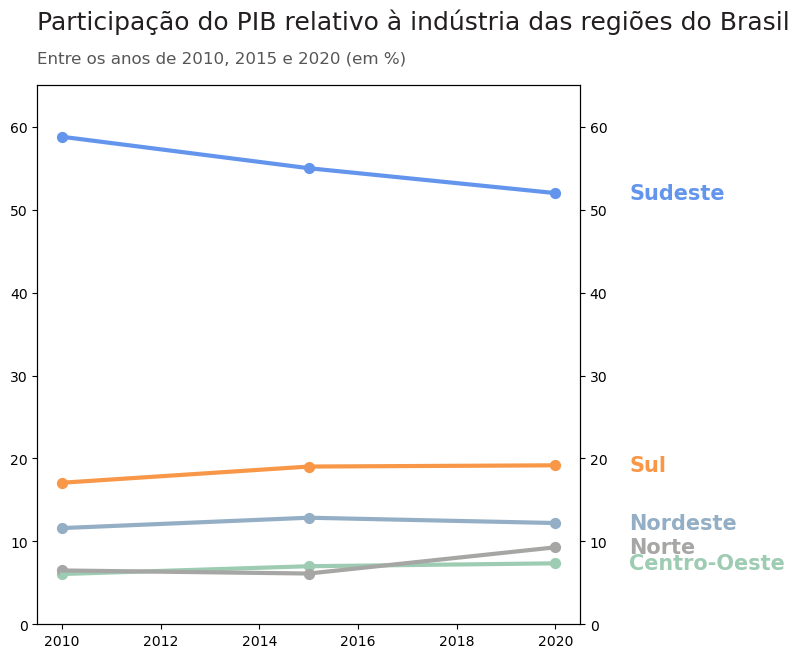

In [26]:
def grafico_slope_industria():
  # Importando as bibliotecas
  import matplotlib.pyplot as plt

  # Área do gráfico e tema da visualização
  fig, ax1 = plt.subplots(figsize=(7,7))

  # Definindo as cores do gráfico
  cores = [AZUL3, LARANJA1, AZUL5, VERDE3, CINZA4]

  # Gerando um axis duplo partilhando o eixo x e os mesmos limites em y
  ax2 = ax1.twinx()
  ax1.set_ylim([0,65])
  ax2.set_ylim([0,65])

  # Gerando o gráfico de inclinação (pontos + curva + texto)
  for i in range(5):
    # Adicionando o ponto inicial e final
    ax1.scatter(x = df_industria_slope.index, y = df_industria_slope.iloc[:,i], color = cores[i], s = 50)

    # Adicionando a inclinação
    ax1.plot(df_industria_slope.index, df_industria_slope.iloc[:,i], color = cores[i], lw = 3)

    # Adicionando as regiões no label
    ax1.text(x = 2021.5, y = df_industria_slope.iloc[-1,i], s = df_industria_slope.columns[i],
            fontsize=15, fontweight = 'bold', color=cores[i], va='center')

  ## Personalizando o gráfico
  ax1.set_title('Participação do PIB relativo à indústria das regiões do Brasil', fontsize = 18, color = CINZA1, loc='left', pad = 40)
  ax1.text(0, 1.05, "Entre os anos de 2010, 2015 e 2020 (em %)", transform=ax1.transAxes, color= CINZA3, fontsize=12, ha='left', va='center')

  return ax1, ax2, cores

ax1, ax2, cores = grafico_slope_industria()

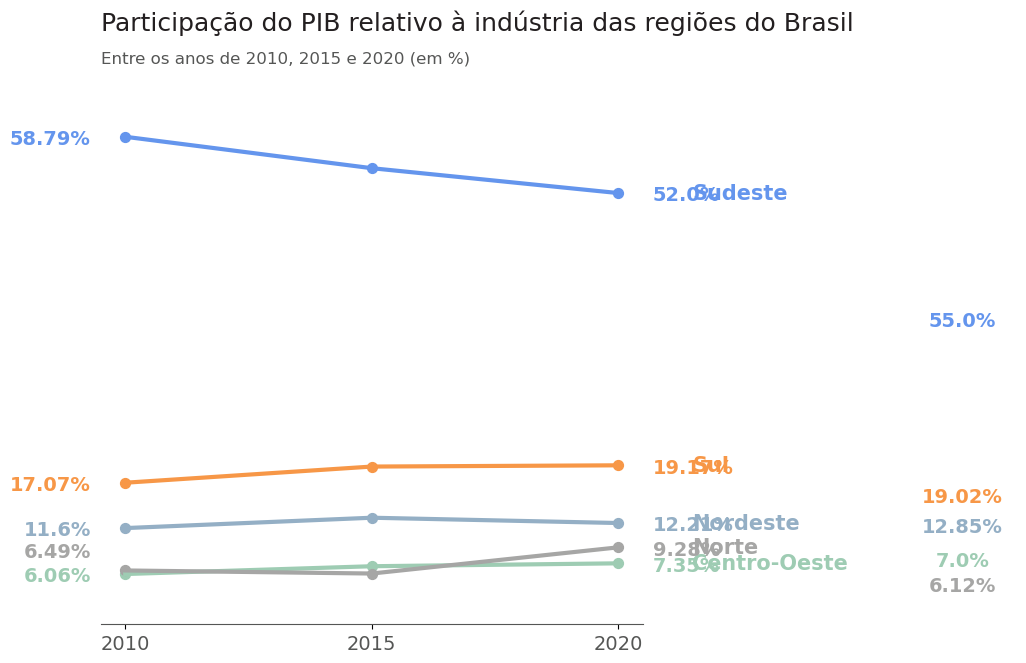

In [27]:
ax1, ax2, cores = grafico_slope_industria()

ax1.tick_params(left = False)
ax1.spines[['top', 'left', 'right']].set_visible(False)
ax2.tick_params(right = False)
ax2.set_frame_on(False)

plt.setp(ax1, xticks=[2010, 2015, 2020], xticklabels = ["2010", "2015", "2020"],
         yticks = df_industria_slope.iloc[0,:],
         yticklabels = [f'{str(valor)}%' if i!= 4 else f'{str(valor)}%\n\n' for i, valor in enumerate(df_industria_slope.iloc[0,:])]
         )

# Ajustando as propriedades do dos pontos centrais
valores = df_industria_slope.iloc[1,:].values
y_pos = [53, 17, 11, 4,-1]
for i in range(len(valores)):
  ax1.text(2015, y_pos[i], f'{valores[i]}%', weight = "bold", fontsize = 14, color = cores[i], ha="center", transform=ax.transData)

# Ajustando as propriedades do eixo y da direita
plt.setp(ax2, yticks = df_industria_slope.iloc[2,:],
         yticklabels = [f'{str(valor)}%' for i, valor in enumerate(df_industria_slope.iloc[2,:])])

# Ajustando propriedades dos dois eixos y
for ax in (ax1, ax2):
  for i, item in enumerate(ax.get_yticklabels()):
    item.set_fontsize(14)
    item.set_fontweight('bold')
    item.set_color(cores[i])

# Ajustando propriedades do eixo x
ax1.xaxis.set_tick_params(labelsize=14, labelcolor=CINZA3)
ax1.spines['bottom'].set_color(CINZA3)

plt.show()

## Aula 05 - Relacionando dados

### Desafio 1

In [28]:
ideb = pd.read_csv("https://raw.githubusercontent.com/afonsosr2/dataviz-graficos-composicao-relacionamento/master/dados/ideb_reg_2005_2021.csv")

ideb.tail()

,ano,regiao,rede,ensino,anos_escolares,taxa_aprovacao,indicador_rendimento,nota_saeb_matematica,nota_saeb_lingua_portuguesa,nota_saeb_media_padronizada,ideb
265,2021,Sudeste,estadual,medio,EM,92.9,0.889286,267.04,274.92,4.555645,4.1
266,2021,Sul,privada,medio,EM,98.3,0.972665,329.04,317.96,6.070743,5.9
267,2021,Sul,estadual,medio,EM,88.2,0.881802,276.23,280.28,4.764957,4.2
268,2021,Centro-Oeste,privada,medio,EM,98.6,0.990196,324.06,313.85,5.939272,5.9
269,2021,Centro-Oeste,estadual,medio,EM,88.4,0.872412,267.71,273.00,4.536312,4.0


In [29]:
anos = [x for x in range(2013, 2022, 2)]

ideb_efaf = ideb.query('ano == @anos and anos_escolares == "EFAF"')[['ano', 'nota_saeb_lingua_portuguesa', 'nota_saeb_matematica']]
ideb_efaf = ideb_efaf.reset_index(drop = True)

ideb_efaf.head()

,ano,nota_saeb_lingua_portuguesa,nota_saeb_matematica
0,2013,242.41,246.08
1,2013,280.08,291.98
2,2013,229.52,232.36
3,2013,273.80,283.20
4,2013,235.19,235.36


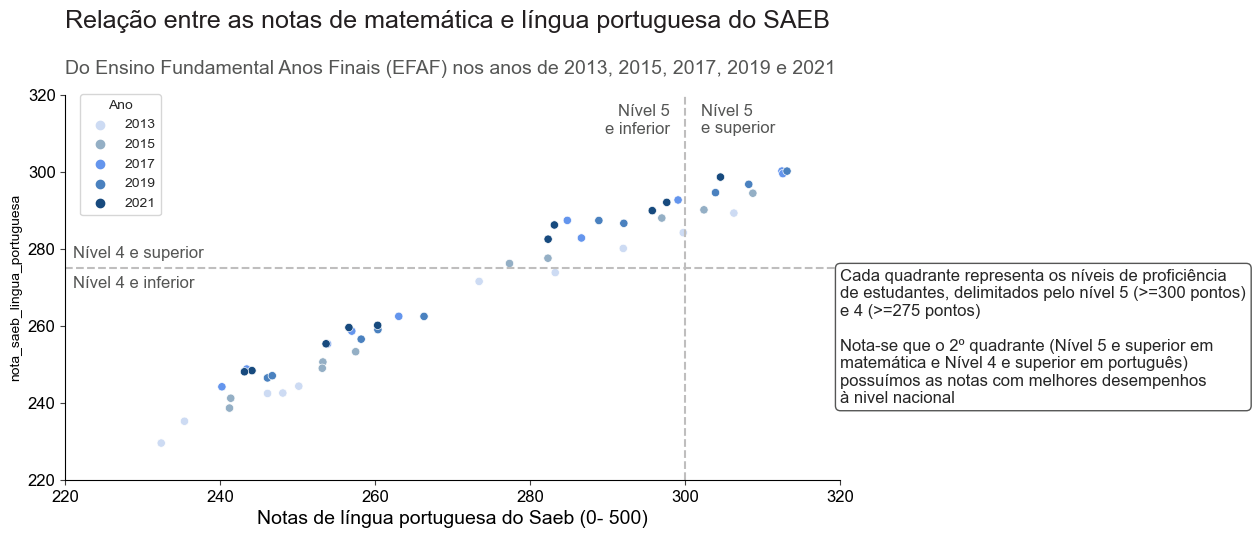

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

cores = [AZUL6, AZUL5, AZUL3, AZUL2, AZUL1]

fig, ax = plt.subplots(figsize = (10, 5))
sns.set_theme(style = 'white')

ax = sns.scatterplot(data = ideb_efaf, x = 'nota_saeb_matematica', y = 'nota_saeb_lingua_portuguesa', hue = 'ano', palette = cores)

plt.suptitle('Relação entre as notas de matemática e língua portuguesa do SAEB', size = 18, color = CINZA1, ha = 'right', x = 0.89, y = 1.05)
plt.title('Do Ensino Fundamental Anos Finais (EFAF) nos anos de 2013, 2015, 2017, 2019 e 2021', fontsize = 14, color = CINZA3, pad = 15, loc = 'left')
ax.legend(bbox_to_anchor = (221, 322), title = 'Ano', title_fontsize = 10, fontsize = 10, loc = 'upper left', bbox_transform = ax.transData)
ax.set_xlabel('Notas de matemática do Saeb (0- 500)', fontsize = 14)
ax.set_xlabel('Notas de língua portuguesa do Saeb (0- 500)', fontsize = 14)
ax.xaxis.set_tick_params(labelsize = 12, color = CINZA2)
ax.yaxis.set_tick_params(labelsize = 12, color = CINZA2)
ax.set_xlim(220, 320)
ax.set_ylim(220, 320)
sns.despine()

ax.text(ax.get_xlim()[0] + 1, 277, 'Nível 4 e superior', fontsize = 12, color = CINZA3, va = 'bottom')
ax.text(ax.get_xlim()[0] + 1, 273, 'Nível 4 e inferior', fontsize = 12, color = CINZA3, va = 'top')
plt.axhline(y = 275, color = CINZA5, linestyle = '--')

ax.text(298, ax.get_ylim()[1] - 10, 'Nível 5\ne inferior', fontsize = 12, color = CINZA3, ha = 'right')
ax.text(302, ax.get_ylim()[1] - 10, 'Nível 5\ne superior', fontsize = 12, color = CINZA3, ha = 'left')
plt.axvline(x = 300, color = CINZA5, linestyle = '--')

ax.annotate("Cada quadrante representa os níveis de proficiência\nde estudantes, delimitados pelo nível 5 (>=300 pontos)\ne 4 (>=275 pontos)\n\n"
            "Nota-se que o 2º quadrante (Nível 5 e superior em \nmatemática e Nível 4 e superior em português)\n"
            "possuímos as notas com melhores desempenhos \nà nivel nacional", xy=(320, 240), xycoords='data',
            bbox=dict(boxstyle="round", fc=BRANCO, ec=CINZA3),
            xytext=(0, 0), textcoords='offset points')

plt.show()

### Desafio 2

In [31]:
ideb_em = ideb.query('anos_escolares == "EM"')[['regiao', 'nota_saeb_matematica', 'nota_saeb_lingua_portuguesa', 'taxa_aprovacao']]
ideb_em = ideb_em.reset_index(drop = True)
ideb_em.head()

,regiao,nota_saeb_matematica,nota_saeb_lingua_portuguesa,taxa_aprovacao
0,Centro-Oeste,261.23,251.52,68.0
1,Centro-Oeste,338.52,309.85,92.4
2,Nordeste,247.52,237.10,68.2
3,Nordeste,319.33,299.08,90.8
4,Norte,243.61,236.07,68.8


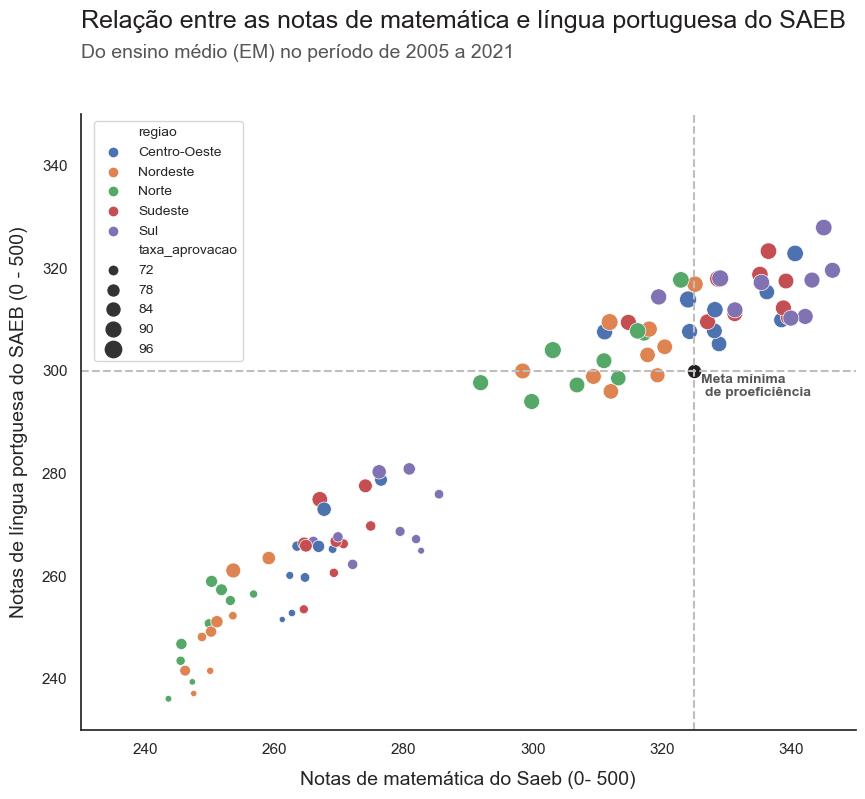

In [57]:
cores = [VERDE3, VERMELHO2, AZUL3, LARANJA1, CINZA4]

fig, ax = plt.subplots(figsize = (10,8))

ax = sns.scatterplot(data = ideb_em, x = 'nota_saeb_matematica', y = 'nota_saeb_lingua_portuguesa', hue = 'regiao',
                     size = 'taxa_aprovacao', sizes = (20, 150), color = AZUL3)

ax.scatter([325], [300], color = CINZA1, s = 75)
plt.axvline(x = 325, color = CINZA5, linestyle = '--')
plt.axhline(y = 300, color = CINZA5, linestyle = '--')
ax.text(326, 295, 'Meta mínima\n de proeficiência', color = CINZA3, fontsize = 10, fontweight = 'bold')

plt.suptitle('Relação entre as notas de matemática e língua portuguesa do SAEB', size = 18, color = CINZA1, ha = 'right', x = 0.89, y = 1.01)
plt.title('Do ensino médio (EM) no período de 2005 a 2021', fontsize = 14, color = CINZA3, pad = 40, loc = 'left')
ax.legend(bbox_to_anchor = (231, 350), fontsize = 10, loc = 'upper left', bbox_transform = ax.transData)
ax.xaxis.set_tick_params(labelsize = 11, color = CINZA2)
ax.yaxis.set_tick_params(labelsize = 11, color = CINZA2)
ax.set_xlim(230, 350)
ax.set_ylim(230, 350)
sns.despine()

ax.set_xlabel('Notas de matemática do Saeb (0- 500)',fontsize = 14, labelpad = 10)
ax.set_ylabel('Notas de língua portguesa do SAEB (0 - 500)', fontsize = 14, labelpad = 10)

plt.show()

: 

: 